In [1]:
import cartopy
import matplotlib.pyplot as plt
import cartopy.mpl.gridliner as gridliner
import matplotlib.ticker as mticker
import cartopy.mpl.ticker as cartopyticker
import cartopy.crs as ccrs
import cartopy.feature as cf
import numpy as np
lon_formatter = cartopyticker.LongitudeFormatter()
lat_formatter = cartopyticker.LatitudeFormatter()
plt.rcParams.update({'font.size': 12})

In [2]:
coordinates = (-19.001, -11.49, 26.99, 30.001)
myproj = cartopy.crs.Mercator(central_longitude=0.5 * (coordinates[0] + coordinates[1]), 
                              min_latitude=coordinates[2], max_latitude=coordinates[3], 
                              globe=None, latitude_true_scale=None)
data_crs = ccrs.PlateCarree()

In [3]:
textprops = dict(facecolor='white', alpha=0.05, edgecolor='white')

In [4]:
def add_release_position(ax):
    textkwargs = dict(fontsize=18, transform=data_crs, ha="center", va="bottom", zorder=8)
    ax.plot(-12.8442, 29.0813, "ko", ms=8, zorder=8, transform=data_crs)
    ax.text(-12.8442, 29.0813, "A", **textkwargs)
    ax.plot(-13.0722, 29.2632, "ko", ms=8, zorder=8, transform=data_crs)
    ax.text(-13.0722, 29.2632, "B", **textkwargs)
    ax.plot(-13.8402, 28.8031, "ko", ms=8, zorder=8, transform=data_crs)
    ax.text(-13.8402, 28.8031, "C", **textkwargs)
    ax.plot(-13.7202, 28.6398, "ko", ms=8, zorder=8, transform=data_crs)
    ax.text(-13.7202, 28.6398, "D", **textkwargs)

In [5]:
def add_island_names(ax):
    plotkwargs = dict(transform=data_crs, ha="center", fontsize=14, bbox=textprops, zorder=7)
    ax.text(-15.5917, 27.975, "Gran Canaria", **plotkwargs)
    ax.text(-16.573, 28.222, "Tenerife", **plotkwargs)
    ax.text(-17.8391, 28.6906, "La Palma", **plotkwargs)
    ax.text(-18.0093, 27.7364, "El Hierro", **plotkwargs)
    ax.text(-17.2252, 28.1168, "La Gomera", **plotkwargs)
    ax.text(-14.013, 28.411, "Fuerteventura", **plotkwargs)
    ax.text(-13.672, 29.027, "Lanzarote", **plotkwargs)
    
def add_legend(colordict, ax):

    for k, v in colordict.items():
        ax.plot(0., 0., "s", color=v, markersize=15, label=k)
    plt.legend()

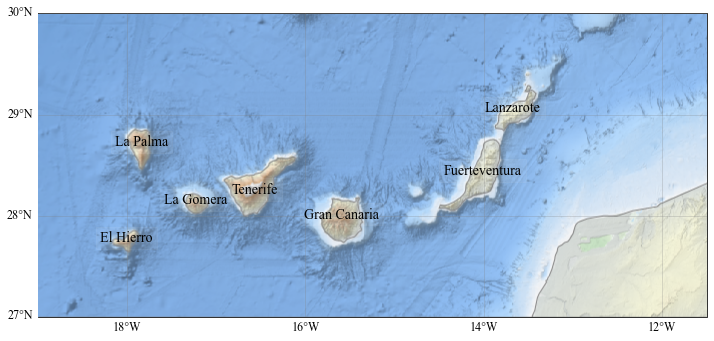

In [6]:
fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection=myproj)

# Release positions
#add_release_position(ax)

# Island names
add_island_names(ax)

"""
# Traffic density map (2020)
ax.add_wms(wms='https://ows.emodnet-humanactivities.eu/wms',
           layers=['2020_yearly_rd_All'], alpha=.85, zorder=4)
"""

# EMODnet bathymetry
ax.add_wms(wms='http://ows.emodnet-bathymetry.eu/wms',
               layers=['emodnet:mean_atlas_land', 'coastlines'],
               transform=myproj, zorder=3)

# Grid lines and labels
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=.5, color='gray', alpha=0.5, linestyle='-', zorder=6)

gl.top_labels = False
gl.right_labels = False
gl.xlocator = mticker.FixedLocator(np.arange(-20., -10., 2.))
gl.ylocator = mticker.FixedLocator(np.arange(26., 31., 1.))

# Domain extension
ax.set_extent(coordinates)

plt.savefig("../figures/canary_map0001.png", dpi=300, bbox_inches="tight")
plt.show()

## Archipielago Chinijo

In [12]:
coordinates = (-14.65, -12.49, 27.99, 29.501)
myproj = cartopy.crs.Mercator(central_longitude=0.5 * (coordinates[0] + coordinates[1]), 
                              min_latitude=coordinates[2], max_latitude=coordinates[3], 
                              globe=None, latitude_true_scale=None)

In [9]:
colordict = {"Parques Naturales": "#FCFC51",
             "Monumentos Naturales": "#004078",
             "Paisaje Protejido": "#80A0BD",
             "Parque Natural": "#F78000",
             "Parque Rural": "#E60000",
             "Reserva Natural Especial": "#00913F",
             "Reserva Natural Integral": "#034A31",
             "Sitio de Interés Cientifico": "#BADBCA"
            }
colordict = {"Natural parks": "#FCFC51",
             "Natural monuments": "#004078",
             "Protected landscape": "#80A0BD",
             "Natural park": "#F78000",
             "Rural park": "#E60000",
             #"Special natural reserve": "#00913F",
             #"Integral natural reserve": "#034A31",
             #"Site of scientific interest": "#BADBCA"
            }

In [17]:
fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection=myproj)

plotkwargs = dict(transform=data_crs, ha="center", fontsize=18, bbox=textprops, zorder=7)

ax.text(-14.013, 28.411, "Fuerteventura", **plotkwargs)
ax.text(-13.672, 29.027, "Lanzarote", **plotkwargs)

# Release positions
add_release_position(ax)

"""
ax.add_wms(wms='https://ows.emodnet-humanactivities.eu/wms',
           layers=['2020_yearly_rd_All'], alpha=.85, zorder=4)
"""           

ax.add_wms(wms='http://ows.emodnet-bathymetry.eu/wms',
               layers=['emodnet:mean_atlas_land'],
               transform=myproj2, zorder=3)

"""
ax.add_wms(wms='http://ows.emodnet-bathymetry.eu/wms',
               layers=['coastlines'],
               transform=myproj2, zorder=9)
"""
add_legend(colordict, ax)


gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=.5, color='gray', alpha=0.5, linestyle='-', zorder=6)

ax.add_wms(wms='https://idecan2.grafcan.es/ServicioWMS/EspNat?',
               layers=['EENN'],
               transform=myproj, zorder=5, alpha=.6)

gl.top_labels = False
gl.right_labels = False
gl.xlocator = mticker.FixedLocator(np.arange(-20., -12., 0.5))
gl.ylocator = mticker.FixedLocator(np.arange(26., 31., 0.5))

ax.set_extent(coordinates)

coast = cf.GSHHSFeature(scale='f')
ax.add_feature(coast, zorder=10)
plt.savefig("../figures/canary_map05.png", dpi=300, bbox_inches="tight")

plt.close()

/home/ctroupin/Software/PythonEnvs/EMODnetPlot/lib/python3.8/site-packages/shapefile.py:391: UserWarning: Shapefile shape has invalid polygon: no exterior rings found (must have clockwise orientation); interpreting holes as exteriors.
  warnings.warn('Shapefile shape has invalid polygon: no exterior rings found (must have clockwise orientation); interpreting holes as exteriors.')
